In [165]:
import pandas as pd
import statsmodels.formula.api as smf

from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

plt.style.use('seaborn')

df = pd.read_csv("exams.csv")
df
df.dropna()
df.assign(Average=df.mean(1), Stddev=df.std(1))


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average,Stddev
0,female,group A,some college,standard,none,49,58,58,55.000000,5.196152
1,female,group E,some college,standard,none,58,60,58,58.666667,1.154701
2,male,group D,bachelor's degree,standard,none,60,63,57,60.000000,3.000000
3,female,group D,some college,free/reduced,none,64,82,77,74.333333,9.291573
4,male,group B,some college,free/reduced,none,66,67,65,66.000000,1.000000
5,female,group D,high school,standard,completed,63,72,72,69.000000,5.196152
6,male,group D,some high school,standard,completed,84,94,92,90.000000,5.291503
7,female,group C,some high school,standard,completed,74,81,75,76.666667,3.785939
8,female,group B,some high school,standard,completed,81,95,96,90.666667,8.386497
9,female,group C,associate's degree,standard,completed,68,87,86,80.333333,10.692677


In [168]:
df.columns=["Gender", "Race", "Parent Education Level", "Lunch", "Test Prep Course", "Math Score", "Reading Score", "Writing Score"]
df=df.drop(columns = ["Race", "Lunch"])
df.head()

,Gender,Parent Education Level,Test Prep Course,Math Score,Reading Score,Writing Score
0,female,some college,none,49,58,58
1,female,some college,none,58,60,58
2,male,bachelor's degree,none,60,63,57
3,female,some college,none,64,82,77
4,male,some college,none,66,67,65


sns.pairplot(df)
sns.plt.show()

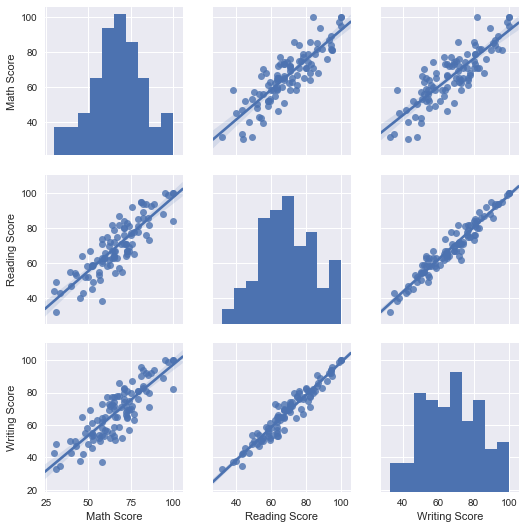

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns
 
   
#regressional show test scores compared to other test scores
sns.pairplot(df, kind="reg")
plt.show()



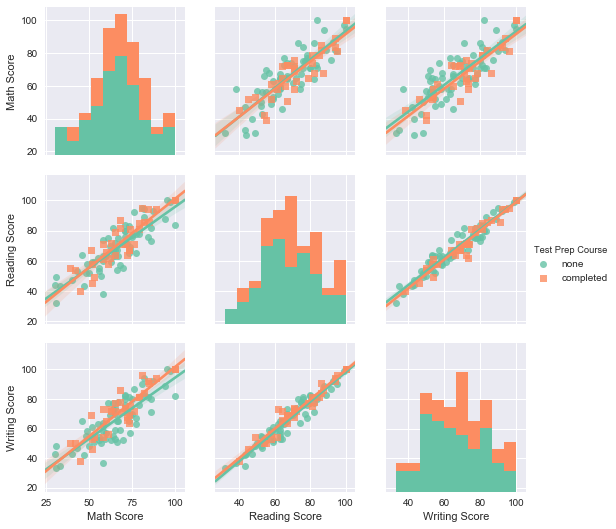

In [170]:
# Test Prep Courses and Scores with Regression
sns.pairplot(df, kind="reg", hue="Test Prep Course", markers= ["o","s"], palette="Set2")
plot_kws={"s": .02}
plot_kws={"o": .02}

plt.show()

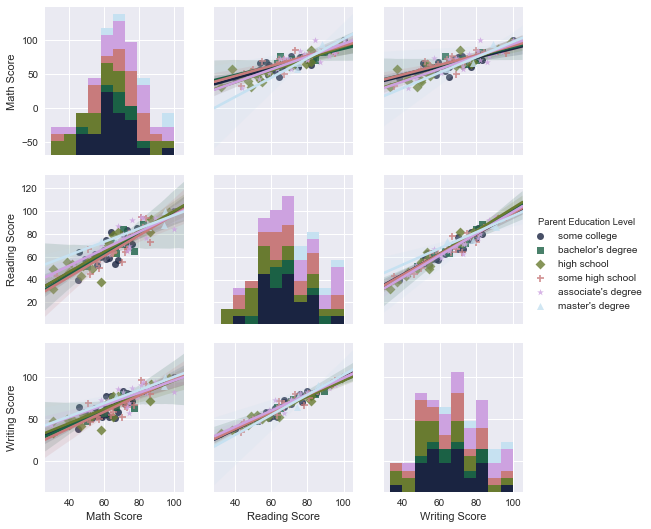

In [182]:
# Parent Educational Level & Test Score with regression
sns.pairplot(df, kind="reg", hue="Parent Education Level", markers= ["o","s", "D", "+", "*", "^"], palette="cubehelix")
plot_kws={"s": .02}
plot_kws={"o": .02}
plot_kws={"D": .02}
plot_kws={"+": .02}
plot_kws={"*": .02}
plot_kws={"^": .02}
plt.show()




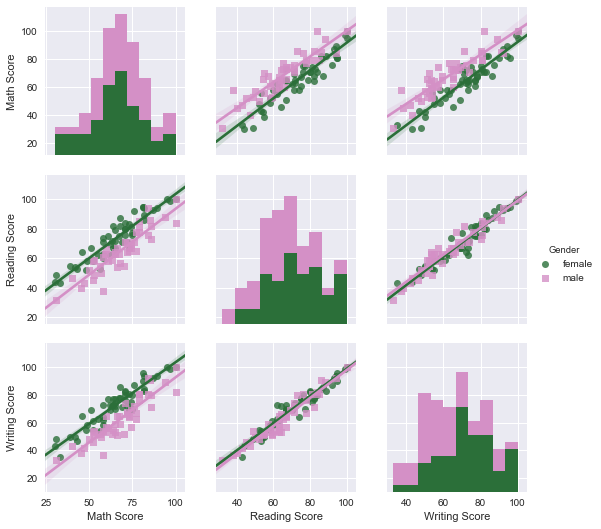

In [172]:
# Gender and Test Score with regression

sns.pairplot(df, kind="reg", hue="Gender", markers= ["o","s"], palette="cubehelix")
plot_kws={"s": .02}
plot_kws={"o": .02}

plt.show()

In [174]:
#Regressional Analysis of Math and Reading Score
import statsmodels.api as sm

Y = df["Math Score"]

X = df[["Reading Score"]]

model = sm.OLS(Y,X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Math Score   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     6707.
Date:                Sat, 15 Dec 2018   Prob (F-statistic):           9.18e-93
Time:                        13:17:55   Log-Likelihood:                -352.35
No. Observations:                 100   AIC:                             706.7
Df Residuals:                      99   BIC:                             709.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Reading Score     0.9534      0.012     81.895

# Box and Violin Plots for comparing each subject with Test Prep Courses

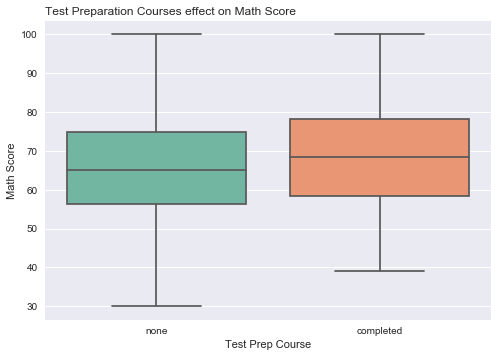

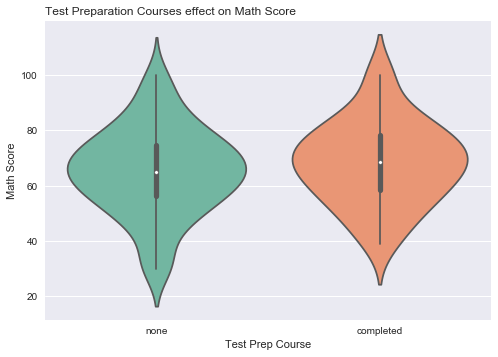

In [175]:
plt.title('Test Preparation Courses effect on Math Score', loc='left')

sns.boxplot(x='Test Prep Course', y='Math Score', data=df, palette="Set2" )
plt.show()

plt.title('Test Preparation Courses effect on Math Score', loc='left')
sns.violinplot( x='Test Prep Course', y='Math Score', data=df, palette="Set2")

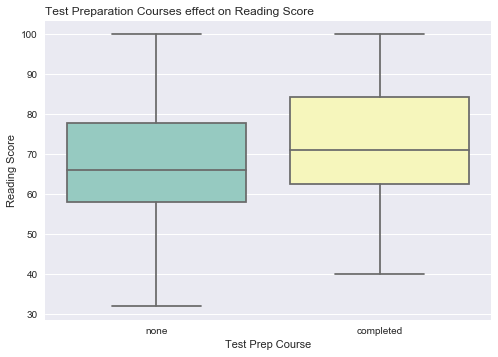

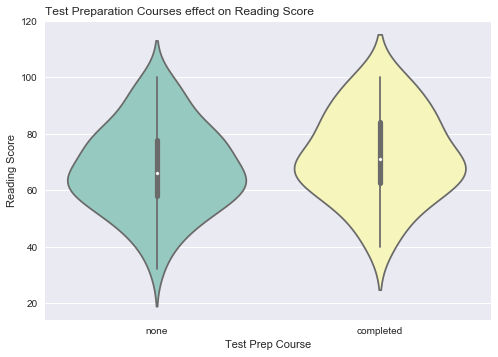

In [176]:
plt.title('Test Preparation Courses effect on Reading Score', loc='left')
sns.boxplot(x='Test Prep Course', y='Reading Score', data=df, palette="Set3")
plt.show()

plt.title('Test Preparation Courses effect on Reading Score', loc='left')
sns.violinplot( x='Test Prep Course', y='Reading Score', data=df, palette="Set3")

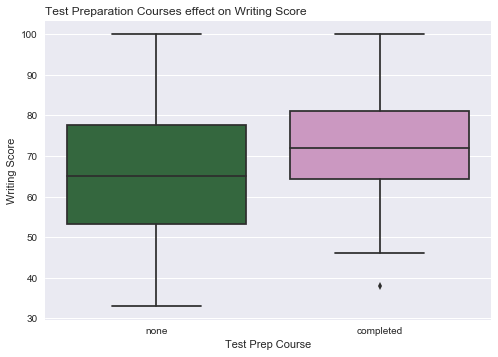

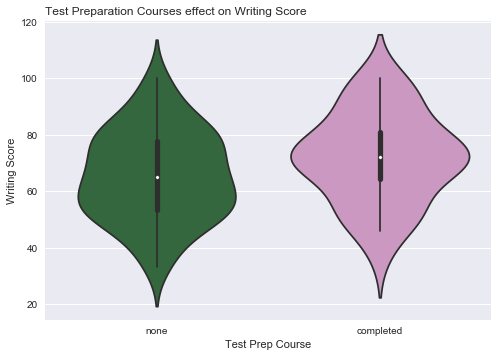

In [177]:
plt.title('Test Preparation Courses effect on Writing Score', loc='left')
sns.boxplot(x='Test Prep Course', y='Writing Score', data=df, palette="cubehelix")
plt.show()

plt.title('Test Preparation Courses effect on Writing Score', loc='left')
sns.violinplot( x='Test Prep Course', y='Writing Score', data=df, palette="cubehelix")

# Box and Violin Plots for comparing each subject with Parent Level of Education

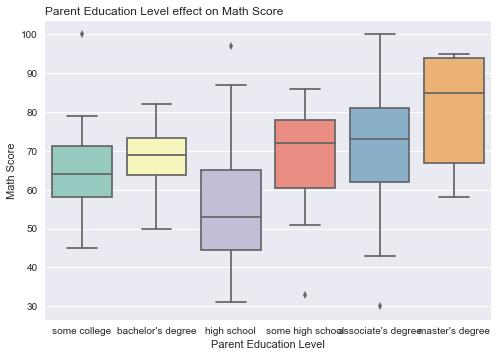

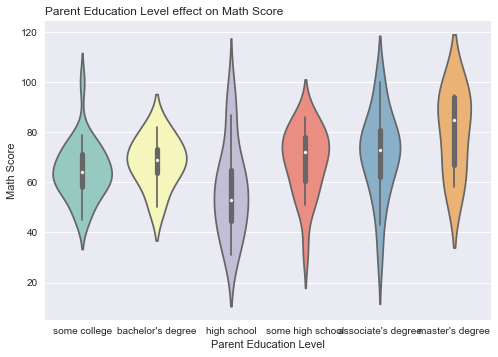

In [178]:
plt.title('Parent Education Level effect on Math Score', loc='left')
sns.boxplot(x='Parent Education Level', y='Math Score', data=df, palette="Set3")
plt.show()

plt.title('Parent Education Level effect on Math Score', loc='left')
sns.violinplot( x='Parent Education Level', y='Math Score', data=df, palette="Set3", fontsize=3)

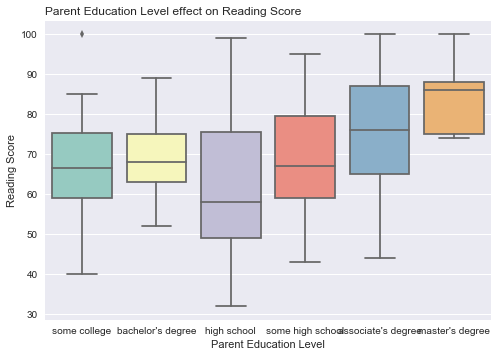

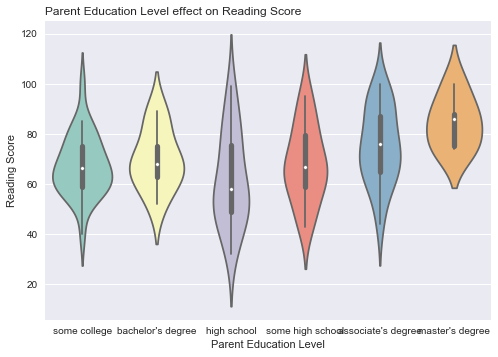

In [179]:
plt.title('Parent Education Level effect on Reading Score', loc='left')
sns.boxplot(x='Parent Education Level', y='Reading Score', data=df, palette="Set3")
plt.show()

plt.title('Parent Education Level effect on Reading Score', loc='left')
sns.violinplot( x='Parent Education Level', y='Reading Score', data=df, palette="Set3", fontsize=3)

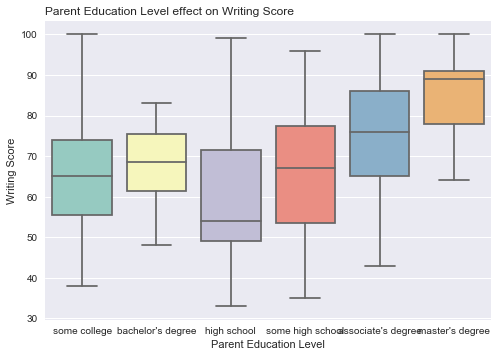

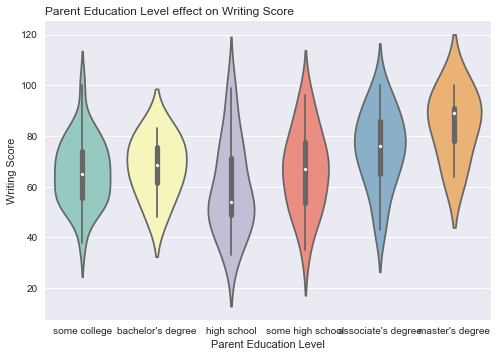

In [180]:
plt.title('Parent Education Level effect on Writing Score', loc='left')
sns.boxplot(x='Parent Education Level', y='Writing Score', data=df, palette="Set3")
plt.show()

plt.title('Parent Education Level effect on Writing Score', loc='left')
sns.violinplot( x='Parent Education Level', y='Writing Score', data=df, palette="Set3", fontsize=3)

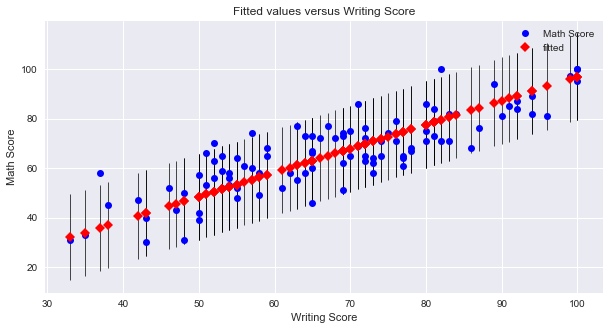

In [181]:
X = df["Writing Score"]
Y = df["Math Score"]

m1 = sm.OLS(Y,X).fit()

fig, ax = plt.subplots(figsize=(10,5))
fig = sm.graphics.plot_fit(m1, 0, ax=ax)

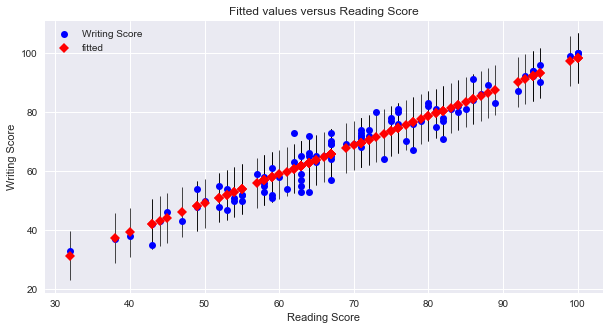

In [156]:
X = df["Reading Score"]
Y = df["Writing Score"]

m1 = sm.OLS(Y,X).fit()

fig, ax = plt.subplots(figsize=(10,5))
fig = sm.graphics.plot_fit(m1, 0, ax=ax)

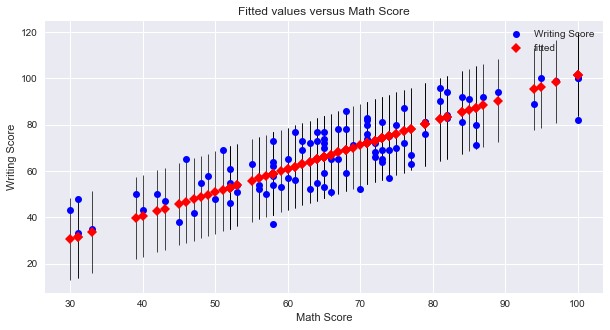

In [159]:
X = df["Math Score"]
Y = df["Writing Score"]

m1 = sm.OLS(Y,X).fit()

fig, ax = plt.subplots(figsize=(10,5))
fig = sm.graphics.plot_fit(m1, 0, ax=ax)